In [1]:
import librosa
import numpy as np
import pandas as pd
import os

In [2]:
folder = folder = "../data/raw/"
files = os.listdir(folder)

print("Files found:", files)

Files found: ['angry_song (1).mp3', 'angry_song (10).mp3', 'angry_song (11).mp3', 'angry_song (12).mp3', 'angry_song (13).mp3', 'angry_song (14).mp3', 'angry_song (15).mp3', 'angry_song (16).mp3', 'angry_song (17).mp3', 'angry_song (18).mp3', 'angry_song (19).mp3', 'angry_song (2).mp3', 'angry_song (20).mp3', 'angry_song (21).mp3', 'angry_song (3).mp3', 'angry_song (4).mp3', 'angry_song (5).mp3', 'angry_song (6).mp3', 'angry_song (7).mp3', 'angry_song (8).mp3', 'angry_song (9).mp3', 'dramatic_song (1).mp3', 'dramatic_song (10).mp3', 'dramatic_song (11).mp3', 'dramatic_song (12).mp3', 'dramatic_song (13).mp3', 'dramatic_song (14).mp3', 'dramatic_song (15).mp3', 'dramatic_song (16).mp3', 'dramatic_song (17).mp3', 'dramatic_song (18).mp3', 'dramatic_song (19).mp3', 'dramatic_song (2).mp3', 'dramatic_song (20).mp3', 'dramatic_song (21).mp3', 'dramatic_song (22).mp3', 'dramatic_song (23).mp3', 'dramatic_song (24).mp3', 'dramatic_song (25).mp3', 'dramatic_song (26).mp3', 'dramatic_song (3).m

In [3]:
feature_list = []

for file in files:
    if file.endswith('.mp3') or file.endswith('.wav'):
        path = folder + file
        y, sr = librosa.load(path)

        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        tempo = tempo.item()
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)
        mfccs = [np.mean(m) for m in mfcc]

       
        features = {
                'filename': file,
                'tempo': tempo,
                'spectral_centroid': spectral_centroid,
                'chroma': chroma,
                'zcr': zcr
                    }

        for i, coef in enumerate(mfccs):
            features[f'mfcc_{i+1}'] = coef

        feature_list.append(features)

print("Done!")

Done!


In [6]:
df = pd.DataFrame(feature_list)
df.to_csv('../data/features/features.csv', index=False)
print(df.head())

              filename       tempo  spectral_centroid    chroma       zcr  \
0   angry_song (1).mp3  129.199219        1378.115608  0.465009  0.039450   
1  angry_song (10).mp3   92.285156        1691.952188  0.426493  0.063452   
2  angry_song (11).mp3  151.999081        2514.341945  0.400642  0.115875   
3  angry_song (12).mp3  172.265625        1775.821972  0.443078  0.066181   
4  angry_song (13).mp3  123.046875        2252.840237  0.424491  0.073719   

       mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  
0 -201.127975  118.011101  17.125931  35.390965  11.905364  
1  -70.949554  123.959122   6.585755  27.209921   1.737244  
2  -69.276649   81.959816  -5.915376  13.897682  -6.748541  
3  -99.402237  111.444740   0.688108  25.701288   0.447008  
4  -88.900063   89.363220   5.241252  22.783154  13.811660  


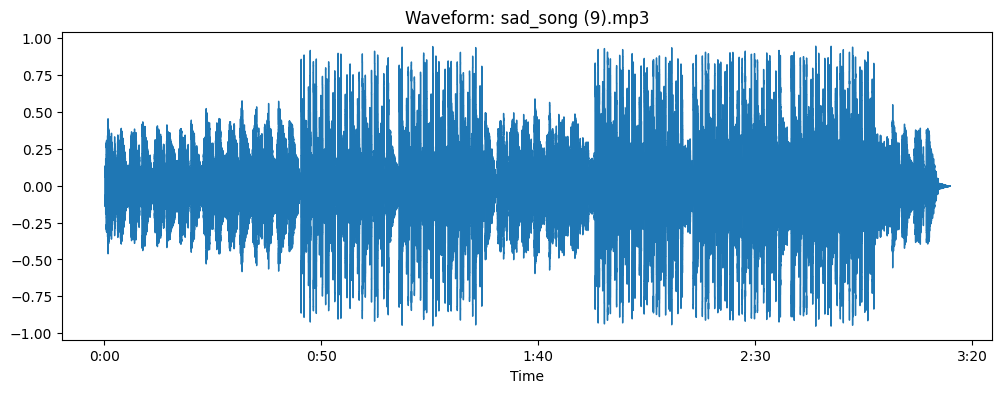

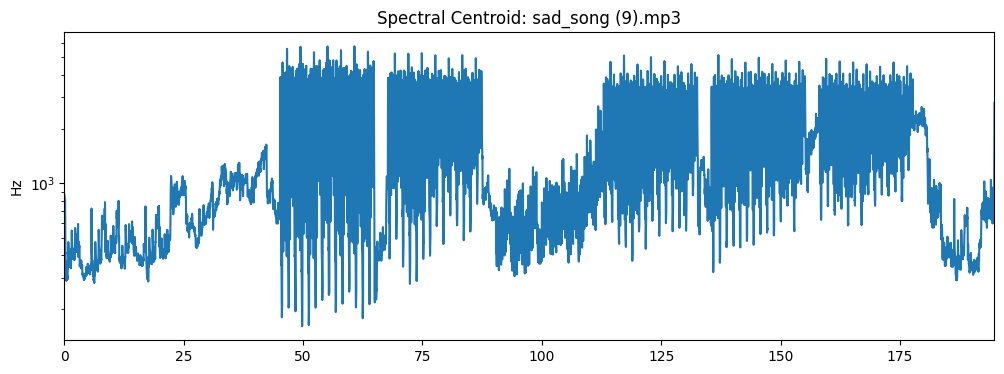

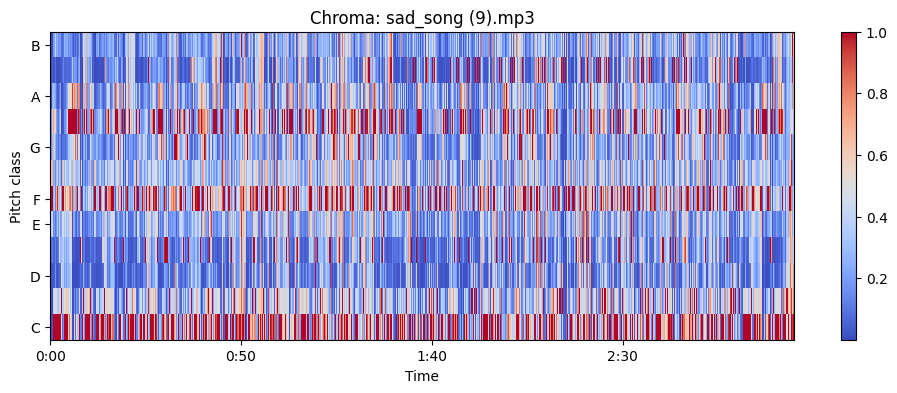

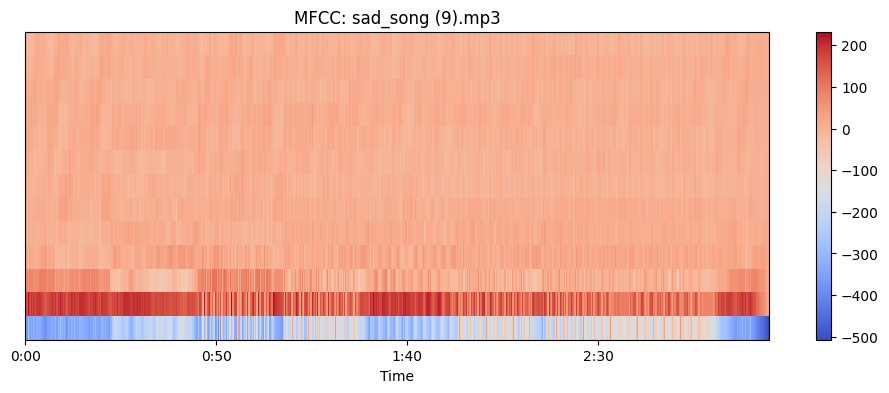

In [7]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform: {file}")
plt.show()

plt.figure(figsize=(12, 4))
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
plt.semilogy(t, spectral_centroids, label='Spectral Centroid')
plt.ylabel('Hz')
plt.xticks()
plt.xlim([0, t[-1]])
plt.title(f"Spectral Centroid: {file}")
plt.show()

plt.figure(figsize=(12, 4))
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title(f"Chroma: {file}")
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 4))
mfccs_full = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
librosa.display.specshow(mfccs_full, x_axis='time')
plt.colorbar()
plt.title(f"MFCC: {file}")
plt.show()
   
